# Assessment 3: Data Integration and Reshaping

Student Name: Girish D Bhatta<br >
Student ID: 29270863<br >
Date: 26/10/2018<br >

Version: 1.0<br >

Environment: Python 3.6 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:


* <b>numpy</b> (to perform array related operations on the columns of the dataframe)
* <b>shapefile</b>(to identify the shapes and ascertain the suburbs)
* <b>json</b>(to read the json file)
* <b>sklearn</b> (To build Linear Regression model on the Data)
* <b>pandas</b>(to extract and perform data processing of csv files and other formats)
* <b>math</b>(to perform mathematical operations to find distance, power, square roots etc.)
* <b>untangle</b>(to read XMl data and perform operations)
* <b>shapely</b> (to perform suburb validations and enclosures)
* <b>statsmodels</b>(to perfrom linear regression and attain R like summary on the model)

## Import Libraries and Dependencies

In [1]:
#importing all the librarires and dependencies

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import json
from math import sin, cos, sqrt, atan2, radians
import shapefile
import numpy as np
from dbfread import DBF
import untangle
from shapely.geometry import Point, Polygon
from sklearn import preprocessing
import math
import statsmodels.api as sm

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## TASK 1

## 1. Importing other Datasets for integration

### 1.1 Shopping centres

In this section we read the Shopping centres dataset which would be used to ascertain the closest shopping centre Id and the distance from the property.

In [2]:
#reading the shopping centre dataset
shopping_centres = pd.read_excel("shopingcenters.xlsx")
shopping_centres.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920452


### 1.2 Hospital Data

In this section we read the Hospital dataset which would bee used to ascertain the closest Hospital Id and the distance from the property.

In [3]:
#reading the hosptals.html file and creating a dataframe 

hosp = pd.read_html("hospitals.html")
hosp = hosp[0].reset_index()
hosp.drop('index',axis=1,inplace=True)
hosp.drop('Unnamed: 0',axis=1,inplace=True)
hosp.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


### 1.3 Real Estate Data

In this section we read the Real Estate data. This dataset will serve as a primary data set and we would be integrating all the other information into this dataset complying to the specified schema.

In [4]:
#read the Json file and using the json.loads function to create a dictionary, which would inturn be used to create a dataframe.
with open("real_state.json","r") as json_data:
       real_dict = json.load(json_data)

real_estate_json_df = pd.DataFrame.from_dict(real_dict,orient='columns')
real_estate_json_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0


Since we have two datasets regarding real estate. One in json and the other in XML, we will look at the information of the read data set and do similar operations on XML dataset.

In [5]:
real_estate_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
addr_street      1004 non-null object
bathrooms        1004 non-null float64
bedrooms         1004 non-null float64
lat              1004 non-null float64
lng              1004 non-null float64
parking_space    1004 non-null float64
price            1004 non-null float64
property_id      1004 non-null float64
property_type    1004 non-null object
year             1004 non-null float64
dtypes: float64(8), object(2)
memory usage: 79.0+ KB


Since we are aggregating the json and xml data into a single dataframe, we have to make sure all the columns and datatypes are of the similar order and type.

<i><b>Reading the contents of the XML File</i></b>

In [6]:
# function that would take the path to the XMl document as an argument and return the dataframe


def XML2DF(pathToXML):
    obj = untangle.parse(pathToXML)
    bathrooms = []
    price = []
    bedrooms = []
    parking_space = []
    year  = []
    lat = []
    lng  = []
    property_type = []
    addr_street = []
    property_id = []
    
    for k in obj.root.bathrooms:
        for i in range(len(obj.root.bathrooms)):
            bathrooms.append(k.children[i].cdata)
            
    for k in obj.root.bedrooms:
        for i in range(len(obj.root.bedrooms)):
            bedrooms.append(k.children[i].cdata)
            
    for k in obj.root.price:
        for i in range(len(obj.root.price)):
            price.append(k.children[i].cdata)
            
    for k in obj.root.parking_space:
        for i in range(len(obj.root.parking_space)):
            parking_space.append(k.children[i].cdata)
            
    
    for k in obj.root.year:
        for i in range(len(obj.root.year)):
            year.append(k.children[i].cdata)
            
    for k in obj.root.lat:
        for i in range(len(obj.root.lat)):
            lat.append(k.children[i].cdata)
            
    for k in obj.root.lng:
        for i in range(len(obj.root.lng)):
            lng.append(k.children[i].cdata)
            
    for k in obj.root.property_type:
        for i in range(len(obj.root.property_type)):
            property_type.append(k.children[i].cdata)
            
    for k in obj.root.addr_street:
        for i in range(len(obj.root.addr_street)):
            addr_street.append(k.children[i].cdata)
    
    for k in obj.root.property_id:
        for i in range(len(obj.root.property_id)):
            property_id.append(k.children[i].cdata)
            
    
    df = pd.DataFrame(
        {
            'addr_street':addr_street,
            'bathrooms' : bathrooms,
            'bedrooms' : bedrooms,
            'lat' : lat,
            'lng': lng,
            'parking_space': parking_space,
            'price': price,
            'property_id': property_id,
            'property_type': property_type,
            'year': year
        })

    return df

In [7]:
#calling the aboe function
real_estate_xml_df = XML2DF("real_state.xml")
real_estate_xml_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,1 Delaney Court,2.0,4.0,-37.712187,144.814218,2.0,10285000.0,11648.0,house,2013.0
1,4/40 Broadmeadows Road,1.0,2.0,-37.704721,144.879609,1.0,3256000.0,16078.0,house,2016.0
2,56 Clifton Street,1.0,2.0,-37.82478333,144.9955292,0.0,5400000.0,53489.0,house,2009.0
3,18 Garnsworthy Street,1.0,3.0,-37.94041824,145.1612091,0.0,5236000.0,78722.0,house,2009.0
4,4 Bonville Court,2.0,3.0,-37.840581,145.074139,2.0,12870000.0,55617.0,house,2013.0


In [8]:
real_estate_xml_df.isna().sum()

addr_street      0
bathrooms        0
bedrooms         0
lat              0
lng              0
parking_space    0
price            0
property_id      0
property_type    0
year             0
dtype: int64

WE note that there are no visibile nulls in the dataframe at this point.

In [9]:
#Conversion of datatypes to that of the parent.

real_estate_xml_df["bathrooms"] = pd.to_numeric(real_estate_xml_df["bathrooms"],errors='coerce')
real_estate_xml_df["bedrooms"] = pd.to_numeric(real_estate_xml_df["bedrooms"],errors='coerce')
real_estate_xml_df["lat"] = pd.to_numeric(real_estate_xml_df["lat"],errors='coerce')
real_estate_xml_df["lng"] = pd.to_numeric(real_estate_xml_df["lng"],errors='coerce')
real_estate_xml_df["parking_space"] = pd.to_numeric(real_estate_xml_df["parking_space"],errors='coerce')
real_estate_xml_df["price"] = pd.to_numeric(real_estate_xml_df["price"],errors='coerce')
real_estate_xml_df["property_id"] = pd.to_numeric(real_estate_xml_df["property_id"],errors='coerce')
real_estate_xml_df["year"] = pd.to_numeric(real_estate_xml_df["year"],errors='coerce')

Since after conversion, certain rows would be in NAN format, which would be nulls. Therefore, we drop them here.

In [10]:
real_estate_xml_df = real_estate_xml_df.dropna(how='any')

In [11]:
real_estate_xml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1003
Data columns (total 10 columns):
addr_street      998 non-null object
bathrooms        998 non-null float64
bedrooms         998 non-null float64
lat              998 non-null float64
lng              998 non-null float64
parking_space    998 non-null float64
price            998 non-null float64
property_id      998 non-null float64
property_type    998 non-null object
year             998 non-null float64
dtypes: float64(8), object(2)
memory usage: 85.8+ KB


We can see that the indexes are not set properly. hence we perform reset index and then go ahead with merging process.

In [12]:
#merging the two dataframes
real_estate_df = pd.concat([real_estate_json_df,real_estate_xml_df],axis=0)

In [13]:
#resetting the index of the merged dataframe.
real_estate_df = real_estate_df.reset_index(drop=True)

In [14]:
real_estate_df.shape

(2008, 10)

We see that there are 2008 rows. are there are any duplicates ?? 

In [15]:
#dropping duplicates and nulls.
real_estate_df = real_estate_df.drop_duplicates()
real_estate_df = real_estate_df.dropna()
real_estate_df.shape

(1979, 10)

WE have around 1979 rows of data.

### 1.4 SuperMarket Data.

In this section we would ascertain the closest Supermarket id and the distance from the property.

In [16]:
#reading the Supermarket data and loading it into a dataframe.
with open("supermarkets.json","r") as json_data:
    super_dict = json.load(json_data)
super_market_df = pd.DataFrame.from_dict(super_dict)
super_market_df.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


### 1.5 Train Data

In this section we read all the train related data and create dataframe for each of them.

#### 1.5.1 Calender Information

In [17]:
# reading the calender.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/calendar.txt","r") as calender_data:
       calender_df = pd.read_csv(calender_data)
calender_df.rename(columns={'ï»¿service_id': 'service_id'}, inplace=True)
calender_df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


#### 1.5.2 Route Information

In [18]:
# reading the routes.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/routes.txt","r") as routes_data:
        routes_df = pd.read_csv(routes_data)
routes_df.rename(columns={'ï»¿route_id': 'route_id'}, inplace=True)
routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


#### 1.5.3 Shape Information

In [19]:
# reading the shapes.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/shapes.txt","r") as shape_data:
        shape_df = pd.read_csv(shape_data)

shape_df.head()
shape_df.rename(columns={'ï»¿shape_id': 'shape_id'}, inplace=True)
shape_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


#### 1.5.4 Stops Information

In [20]:
# reading the stop_times.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/stop_times.txt","r") as stop_data:
        stop_df = pd.read_csv(stop_data)
    
stop_df.head()
stop_df.rename(columns={'ï»¿trip_id': 'trip_id'}, inplace=True)
stop_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


#### 1.5.5 Train Station Information

In [21]:
# reading the stops.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/stops.txt","r") as stop_names_data:
        stop_names_df = pd.read_csv(stop_names_data)
stop_names_df.head()
stop_names_df.rename(columns={'ï»¿stop_id': 'stop_id'}, inplace=True)
stop_names_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


#### 1.5.6 Trip Information

In [22]:
# reading the trips.txt as storing it in a dataframe
with open("./GTFS - Melbourne Train Information/trips.txt","r") as trip_data:
        trip_data_df = pd.read_csv(trip_data)
    
trip_data_df.head()
trip_data_df.rename(columns={'ï»¿route_id': 'route_id'}, inplace=True)
trip_data_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


### 1.6 Suburb Information

In this section, we would read the Suburb information, which is in the shape file and create a dataframe. This would help us locate the coordinates of all the suburbs and would be used while integrating suburb information into the parent dataset.

In [23]:
# function which takes the file path of the shape file and returns the dataframe of the shape information.
def read_shapefile(shp_path):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [24]:
#function call statement to read the shape file and return a dataframe.
poly_sh = read_shapefile("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")
poly_sh.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,coords
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,,,G,None,2,"[(141.74552399, -35.07228701), (141.74552471, ..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,,,G,None,2,"[(148.668767, -37.39571245), (148.66876202, -3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,,,G,None,2,"[(142.92287999, -37.97885997), (142.90449196, ..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,,,G,None,2,"[(147.82335712, -37.66000897), (147.8231274, -..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,,,G,None,2,"[(141.279783, -35.99858911), (141.27988533, -3..."


Now that we have created a dataframe, we will only extract the columns that are of use to us.

In [25]:
#selecting the columns of our interest
poly_sh = poly_sh[["LOC_PID","VIC_LOCA_2","coords"]]
poly_sh.head()

,LOC_PID,VIC_LOCA_2,coords
0,VIC2615,UNDERBOOL,"[(141.74552399, -35.07228701), (141.74552471, ..."
1,VIC1986,NURRAN,"[(148.668767, -37.39571245), (148.66876202, -3..."
2,VIC2862,WOORNDOO,"[(142.92287999, -37.97885997), (142.90449196, ..."
3,VIC734,DEPTFORD,"[(147.82335712, -37.66000897), (147.8231274, -..."
4,VIC2900,YANAC,"[(141.279783, -35.99858911), (141.27988533, -3..."


Now that we have read all the necessay information required for us to perform integration, We move onto the next stage. Which is Data Integration.

## 2. Data Integration

In this section we will go ahead and integrate the information from other sources by perfomring required operations and attaching to the real estate dataset. This way, it would help us to locate the nearest hospital, shopping centre,supermarket Train and suburb related information.

Since the problem description asks us to find the nearest supermarket, shopping centre, hosptial, Train station , suburubs and their respective distances in <b>metres</b>, we will write a generic function that would caluclaute the nearest of all and integrate to the real estate dataframe.

In [26]:
# function to calcualte the distance between any two set of latitude and longitude
def distance(meanLat,meanLong,act_Lat,act_long):
        meanLat = radians(meanLat)
        meanLong = radians(meanLong)
        act_Lat = radians(act_Lat)
        act_long = radians(act_long)
        R = 6378.0
        #dlon = act_long - meanLong\n",
        #dlat = act_Lat - meanLat\n",
        dlon = meanLong - act_long
        dlat = meanLat - act_Lat
        a = sin(dlat / 2)**2 + cos(act_Lat) * cos(meanLat) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        return round(R*c*1000)

In [27]:
# function that will take real estate dataframe, dependent_df is the dataframe info which we want to integgrate into, and the 
# refernce columsn specifies on which column swe are calculating the minimum distance. This function returns a list of tuples, 
# which mentions the index of the real estate informtion, the closest landmark id and the distance from the property.
def find_all_closest(real_estate_df,dependent_df,reference_col):
    closest_list = []
    for i,row in real_estate_df.iterrows():
        #print(row["lat"],row["lng"])
        inner_dict = dict()
        for j,inst in dependent_df.iterrows():
            inner_dict[inst[reference_col]] = distance(row["lat"],row["lng"],inst["lat"],inst["lng"])
            
        closest_list.append((i,min(inner_dict,key= inner_dict.get),min(inner_dict.values())))
    return closest_list

In [28]:
# this fucnction will just integrate into the real estate dataframe by integrating the values passed from the previous function.
def integrate_into_parent(closest_list,id_col,distance_col):
    for each in closest_list:
        real_estate_df.loc[each[0],id_col] = each[1]
        real_estate_df.loc[each[0],distance_col] = each[2]

### 2.1 Integrating Shopping Centres Information

In this section we will integrate shopping centre information. Which will include the closest shopping centre id and the distance from the property.

In [29]:
# we create appropriate columns with default value in the dataframe, which will be replaced by the calculated values. 
real_estate_df["Shopping_center_id"] = "not available"
real_estate_df["Distance_to_sc"] = 0

In [30]:
# getting the closest list of all the shopping centres from the property
closest_list = find_all_closest(real_estate_df,shopping_centres,"sc_id")

# integrating into the parent, that is the real_estate_df on specified columns
integrate_into_parent(closest_list,"Shopping_center_id","Distance_to_sc")

real_estate_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095


In [31]:
real_estate_df.shape

(1979, 12)

After integration we can see that the column count value has gone up by 2. we have added Shopping_center_id and Distance_to_sc

### 2.2 Integrating Hospitals Information

In [32]:
#  we create appropriate columns with default value in the dataframe, which will be replaced by the calculated values. 
real_estate_df["Hospital_id"] = "not available"
real_estate_df["Distance_to_hospital"] = 0

In [33]:
# getting the closest list of all the shopping centres from the property
distance_dict = find_all_closest(real_estate_df,hosp,"id")

# integrating into the parent, that is the real_estate_df on specified columns
integrate_into_parent(distance_dict,"Hospital_id","Distance_to_hospital")
real_estate_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512,hospital_084,1595
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457,hospital_139,1968
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830,hospital_168,1485
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285,hospital_174,1579
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095,hospital_049,2143


In [34]:
real_estate_df.shape

(1979, 14)

After integration we can see that the column count value has gone up by 2. we have added Hospital_id and Distance_to_hospital columns to the real estate dataframe.

### 2.3 Integrating Supermarkets Information

In [35]:
#  we create appropriate columns with default value in the dataframe, which will be replaced by the calculated values.
real_estate_df["Supermarket_id"] = "not available"
real_estate_df["Distance_to_supermaket"] = 0

In [36]:
# getting the closest list of all the shopping centres from the property
distance_dict = find_all_closest(real_estate_df,super_market_df,"id")

# integrating into the parent, that is the real_estate_df on specified columns
integrate_into_parent(distance_dict,"Supermarket_id","Distance_to_supermaket")
real_estate_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512,hospital_084,1595,S_172,174
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457,hospital_139,1968,S_225,2006
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830,hospital_168,1485,S_160,422
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285,hospital_174,1579,S_080,1346
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095,hospital_049,2143,S_024,1996


In [37]:
real_estate_df.shape

(1979, 16)

After integration we can see that the column count value has gone up by 2. we have added Supermarket_id and Distance_to_supermaket columns to the real estate dataframe.

### 2.4 Integrating Train Information

In order to integrate Train information in the real estate dataframe, we first have to collate all train related information into a single repository. This is essential to carry out required operations to find the closest train station, the time taken to reach CBD and to set the Transfer Flag. this method is important because this helps to not lose out on any information. 

In [38]:
# merging stop_names_df,stop_df,trip_data,routes_df,calender_df into a single dataframe based on common columns among these dataframes.
a = pd.merge(stop_names_df,stop_df,how='inner',on="stop_id")
b = pd.merge(a,trip_data_df,how='inner',on="trip_id")
c = pd.merge(b,routes_df,how='inner',on='route_id')
d = pd.merge(c,calender_df,how='inner',on="service_id")
d.head()


,stop_id,stop_name,stop_short_name,stop_lat,stop_lon,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,...,route_type,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319,17187600.T2.2-SYM-B-mjp-1.1.H,04:47:00,04:47:00,1,NaN,...,2,0,0,0,0,0,1,0,20151009,20151011
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922,17187600.T2.2-SYM-B-mjp-1.1.H,04:51:00,04:51:00,2,NaN,...,2,0,0,0,0,0,1,0,20151009,20151011
2,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594,17187600.T2.2-SYM-B-mjp-1.1.H,05:29:00,05:29:00,16,NaN,...,2,0,0,0,0,0,1,0,20151009,20151011
3,19843,Parliament Railway Station,Melbourne City,-37.811054,144.972911,17187600.T2.2-SYM-B-mjp-1.1.H,05:31:00,05:31:00,17,NaN,...,2,0,0,0,0,0,1,0,20151009,20151011
4,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964,17187600.T2.2-SYM-B-mjp-1.1.H,05:34:00,05:38:00,18,NaN,...,2,0,0,0,0,0,1,0,20151009,20151011


Now that we merged all the necessary Train related information. We have to filter certain conditions based on our conditions.
    1. The first condition being that the train should be running on all weekdays. on inspection of calender_df information, we can ascertain that service "T0" is the only service that runs all weekdays. Therefore we have to filter this information.
    2. We are interested in calculating the average travel time to flinders railway station on weekdays between 7-9 AM. In order to achieve this information, we have to consider the departure time and the arrival time from the given information. We have to consider all the trains departing between 7AM - 9AM and reaching flinders before or on 11 AM. we give a necessary buffer for the train to reach hence 11 AM, would'nt miss out on train related information.

We now apply the first condition and obtain all the trian related information for service_id = T0

In [39]:
#creating a subset which will have only T0 information.
subset2 = d[d["service_id"] == "T0"]
subset2.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,...,route_type,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
289837,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319,17071456.T0.2-SYM-F-mjp-1.1.H,04:48:00,04:48:00,1,NaN,...,2,1,1,1,1,1,0,0,20151023,20151122
289838,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922,17071456.T0.2-SYM-F-mjp-1.1.H,04:52:00,04:52:00,2,NaN,...,2,1,1,1,1,1,0,0,20151023,20151122
289839,19841,Flagstaff Railway Station,Melbourne City,-37.811981,144.955654,17071456.T0.2-SYM-F-mjp-1.1.H,05:29:00,05:29:00,15,NaN,...,2,1,1,1,1,1,0,0,20151023,20151122
289840,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594,17071456.T0.2-SYM-F-mjp-1.1.H,05:31:00,05:31:00,16,NaN,...,2,1,1,1,1,1,0,0,20151023,20151122
289841,19843,Parliament Railway Station,Melbourne City,-37.811054,144.972911,17071456.T0.2-SYM-F-mjp-1.1.H,05:33:00,05:33:00,17,NaN,...,2,1,1,1,1,1,0,0,20151023,20151122


We now obtain information based on departure and arrival time info. Additionally, we should also consider all trains with headsign of "City (Flinders Station)", since we are just looking for travel time to CBD. Therefore we apply necessary filters.

In [40]:
filtered_df = subset2[(subset2["departure_time"] >= "07:00:00") & (subset2["departure_time"] <= "09:00:00") & (subset2["arrival_time"] <= "11:00:00") & (subset2["trip_headsign"] == "City (Flinders Street)")]
filtered_df.shape

(3923, 31)

We can see that after filtering we just have 3923 rows of train related information

In [41]:
uniq_trips = list(filtered_df["trip_id"].unique())
len(uniq_trips)

273

We are also looking at 273 unique trips over the entire weekdays.

In order to calculate the time to flinders, we will create two separate dataframes. One with flinders and one without flinders. Once we have obtained two dataframes, we can join on trip id and calulate the corresponding time travel difference between every other station and flinders.

In [42]:
#creating a dataframe which contains all station information for flinders
with_flinders = filtered_df[["stop_id","trip_id","stop_name","arrival_time","departure_time"]][filtered_df["stop_id"] == 19854]
with_flinders.head()

,stop_id,trip_id,stop_name,arrival_time,departure_time
289896,19854,17071465.T0.2-SYM-F-mjp-1.1.H,Flinders Street Railway Station,07:08:00,07:08:00
289914,19854,17071468.T0.2-SYM-F-mjp-1.1.H,Flinders Street Railway Station,07:26:00,07:26:00
289950,19854,17071571.T0.2-SYM-F-mjp-1.1.H,Flinders Street Railway Station,08:26:00,08:26:00
290040,19854,17071471.T0.2-SYM-F-mjp-1.4.H,Flinders Street Railway Station,07:44:00,07:44:00
290055,19854,17071474.T0.2-SYM-F-mjp-1.4.H,Flinders Street Railway Station,07:56:00,07:56:00


In [43]:
#creating a dataframe which contains all station information without flinders
without_flinders = filtered_df[["stop_id","trip_id","stop_name","arrival_time","departure_time"]][filtered_df["stop_id"]!=19854]
without_flinders.head()

,stop_id,trip_id,stop_name,arrival_time,departure_time
289893,19841,17071465.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:01:00,07:01:00
289894,19842,17071465.T0.2-SYM-F-mjp-1.1.H,Melbourne Central Railway Station,07:03:00,07:03:00
289895,19843,17071465.T0.2-SYM-F-mjp-1.1.H,Parliament Railway Station,07:05:00,07:05:00
289908,22180,17071465.T0.2-SYM-F-mjp-1.1.H,Southern Cross Railway Station,07:11:00,07:11:00
289911,19841,17071468.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:19:00,07:19:00


We now merge these two dataframes based on Trip id to attain all the travel infromation from all the stations to flinders for that railway station.

In [44]:
time_df = pd.merge(without_flinders,with_flinders,how='inner',on='trip_id')
time_df.head()

,stop_id_x,trip_id,stop_name_x,arrival_time_x,departure_time_x,stop_id_y,stop_name_y,arrival_time_y,departure_time_y
0,19841,17071465.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:01:00,07:01:00,19854,Flinders Street Railway Station,07:08:00,07:08:00
1,19842,17071465.T0.2-SYM-F-mjp-1.1.H,Melbourne Central Railway Station,07:03:00,07:03:00,19854,Flinders Street Railway Station,07:08:00,07:08:00
2,19843,17071465.T0.2-SYM-F-mjp-1.1.H,Parliament Railway Station,07:05:00,07:05:00,19854,Flinders Street Railway Station,07:08:00,07:08:00
3,22180,17071465.T0.2-SYM-F-mjp-1.1.H,Southern Cross Railway Station,07:11:00,07:11:00,19854,Flinders Street Railway Station,07:08:00,07:08:00
4,19841,17071468.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:19:00,07:19:00,19854,Flinders Street Railway Station,07:26:00,07:26:00


We now calculate the time difference between departure_time_x(departure time from a station other than flinders)and arrival_time_y (arrival time to flinders)

In [45]:
time_df["time_taken"] = abs(pd.to_datetime(time_df["arrival_time_y"]) - pd.to_datetime(time_df["departure_time_x"]))
time_df["time_taken"] = time_df["time_taken"].dt.total_seconds()/60
time_df.head()

,stop_id_x,trip_id,stop_name_x,arrival_time_x,departure_time_x,stop_id_y,stop_name_y,arrival_time_y,departure_time_y,time_taken
0,19841,17071465.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:01:00,07:01:00,19854,Flinders Street Railway Station,07:08:00,07:08:00,7.0
1,19842,17071465.T0.2-SYM-F-mjp-1.1.H,Melbourne Central Railway Station,07:03:00,07:03:00,19854,Flinders Street Railway Station,07:08:00,07:08:00,5.0
2,19843,17071465.T0.2-SYM-F-mjp-1.1.H,Parliament Railway Station,07:05:00,07:05:00,19854,Flinders Street Railway Station,07:08:00,07:08:00,3.0
3,22180,17071465.T0.2-SYM-F-mjp-1.1.H,Southern Cross Railway Station,07:11:00,07:11:00,19854,Flinders Street Railway Station,07:08:00,07:08:00,3.0
4,19841,17071468.T0.2-SYM-F-mjp-1.1.H,Flagstaff Railway Station,07:19:00,07:19:00,19854,Flinders Street Railway Station,07:26:00,07:26:00,7.0


Now that we have calculated the time taken from every station to Flinders we can perform aggregation on the stop_id to calcualte the average time from every station to Flinders.

In [46]:
time_df_agg = time_df.groupby('stop_id_x').agg({'time_taken':'mean'}).reset_index()
time_df_agg.rename(columns={'stop_id_x' : 'Train_station_id'},inplace=True)
time_df_agg.head()

,Train_station_id,time_taken
0,15351,50.0
1,15353,46.0
2,19835,19.0
3,19837,21.0
4,19838,23.0


In [47]:
time_df_agg.shape

(206, 2)

We can observe that there are 206 stations that have direct serive to flinders on weekdays for the given arrival and departure times for the given service.

<b>Closest Station from each property</b>

We now read the stops.txt file which constains the lat long coordinates of each railway station and the station id.

In [48]:
# reading the stops.txt file
train_station_df = pd.read_csv("stops.txt")
train_station_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [49]:
#renaming the columns in appropriate format
train_station_df.rename(columns={'stop_lat': 'lat', 'stop_lon': 'lng'}, inplace=True)
train_station_df.head()

,stop_id,stop_name,stop_short_name,lat,lng
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [50]:
#  we create appropriate columns with default value in the dataframe, which will be replaced by the calculated values.
real_estate_df["Train_station_id"] = 0
real_estate_df["Distance_to_train_station"] = 0

In [51]:
# getting the closest list of all the train stations from the property
distance_dict = find_all_closest(real_estate_df,train_station_df,"stop_id")

## integrating into the parent, that is the real_estate_df on specified columns
integrate_into_parent(distance_dict,"Train_station_id","Distance_to_train_station")
real_estate_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512,hospital_084,1595,S_172,174,19965,217
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457,hospital_139,1968,S_225,2006,20009,735
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830,hospital_168,1485,S_160,422,19851,324
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285,hospital_174,1579,S_080,1346,20021,1353
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095,hospital_049,2143,S_024,1996,19869,1870


Now that we have obtained the closest Train station id and the distance from the property, we have to perform Left outer join on the property dataframe and the time_df_agg dataframe which has the average time taken to flinders. there are 2 scenarios we have to consider here : 
    1. upon merging on train station id, if the time taken column has data present in it, that means the closest station to the property has a direct service to flinders, and we set the Transfer flag to 0.
    2. If the travel time information is NaN or blank, that means the closest station from the property doesnt have a direct service to flinders. if the nearest station from the properties nearest station also doesnt have a direct service we find the closest station from the station closest to the property which has direct service to the station and change the values of other columns accordingly.

In [52]:
# we merge the real_estate_df and time aggregate on left outer join into test_df
test_df = real_estate_df.merge(time_df_agg,how='left',left_on='Train_station_id',right_on='Train_station_id')

In [53]:
test_df.shape

(1979, 19)

We see that the number of rows have remained the same. Which means we have not lost out on any propert information.

In [54]:
test_df[test_df["time_taken"].isnull()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,time_taken
413,31 Emu Road,1.0,3.0,-37.780071,144.881313,2.0,8880000.0,2149.0,house,2013.0,SC_052,903,hospital_056,1516,S_049,1035,20027,2444,NaN
1253,31 Lindenow Street,1.0,3.0,-37.779256,144.881645,2.0,8400000.0,2152.0,house,2012.0,SC_052,808,hospital_003,1587,S_049,949,20027,2448,NaN
1898,34 Lindenow Street,1.0,3.0,-37.778851,144.881241,1.0,8540000.0,2182.0,house,2009.0,SC_052,786,hospital_003,1643,S_049,944,20027,2498,NaN


We can observe that there are 3 properties in the dataset, which have time taken as NaN . Which means for the property given property id's there is no direct train. we have to find the closest statin from the given station which has direct service to flinders and change the values in other columns accordingly.

<b>Transfer Flag</b>

Based on the values in the time_taken column, we will create a Transfer flag and subsutiute 0 for direct service, that is for rows which have Time taken data and for the ones which do not have time taken put 1 as the transfer flag.

In [55]:
# creating transfer flag and putting appropriate values to it
test_df["Transfer_flag"] = -1
test_df["time_taken"].fillna(0,inplace=True)
for i,row in test_df.iterrows():
        if row["time_taken"] != 0:
            test_df.loc[i,"Transfer_flag"] = 0
        else:
            test_df.loc[i,"Transfer_flag"] = 1
            
test_df.rename(columns={'time_taken' : 'travel_min_to_CBD'},inplace=True)
test_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512,hospital_084,1595,S_172,174,19965,217,28.000000,0
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457,hospital_139,1968,S_225,2006,20009,735,33.300000,0
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830,hospital_168,1485,S_160,422,19851,324,30.000000,0
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285,hospital_174,1579,S_080,1346,20021,1353,25.733333,0
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095,hospital_049,2143,S_024,1996,19869,1870,53.142857,0


In [56]:
#rounding of the travel time to 0 decimal places. travel time in minutes
test_df["travel_min_to_CBD"] = round(test_df["travel_min_to_CBD"]) 
test_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,SC_030,1512,hospital_084,1595,S_172,174,19965,217,28.0,0
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,SC_047,3457,hospital_139,1968,S_225,2006,20009,735,33.0,0
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,SC_099,1830,hospital_168,1485,S_160,422,19851,324,30.0,0
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,SC_102,1285,hospital_174,1579,S_080,1346,20021,1353,26.0,0
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,SC_022,5095,hospital_049,2143,S_024,1996,19869,1870,53.0,0


<b>Calculating Indirect Time</b>

Now lets us find the nearest station from the the station with null id's and transfer flag = 1. 

In [57]:
test_df[test_df["Transfer_flag"] == 1]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
413,31 Emu Road,1.0,3.0,-37.780071,144.881313,2.0,8880000.0,2149.0,house,2013.0,SC_052,903,hospital_056,1516,S_049,1035,20027,2444,0.0,1
1253,31 Lindenow Street,1.0,3.0,-37.779256,144.881645,2.0,8400000.0,2152.0,house,2012.0,SC_052,808,hospital_003,1587,S_049,949,20027,2448,0.0,1
1898,34 Lindenow Street,1.0,3.0,-37.778851,144.881241,1.0,8540000.0,2182.0,house,2009.0,SC_052,786,hospital_003,1643,S_049,944,20027,2498,0.0,1


There are 3 rows which have Transfer Flag as 1 and travel_min_to_CBD as 0. Since the station 20027 does not have a direct trian on weekdays and during the desired time interval of 7-9 AM, we will find the closest station from the station 20027 which has direct service to flinders on weekdays.

Now let us ascertian the lat and long cordinates for the station 20027

In [58]:
stop_names_df[stop_names_df["stop_id"] == 20027]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
195,20027,Flemington Racecourse Railway Station,Flemington,-37.787202,144.907589


Its Flemington Racecourse Railway Station with the given coordinates. Using these coordinates we will find the closest railway station which has direct service to flinders.

In [59]:
train_st_lat = -37.787202
train_st_lng = 144.907589
dist = dict()
for i,row in stop_names_df[stop_names_df["stop_id"].isin(time_df_agg["Train_station_id"])].iterrows():
    dist[i] = distance(train_st_lat,train_st_lng,row["stop_lat"],row["stop_lon"])
print("The station closest to 20027 is at index : ",min(dist,key= dist.get),"and at a distance of :",min(dist.values()))

The station closest to 20027 is at index :  193 and at a distance of : 1593


In [60]:
stop_names_df.loc[193]

stop_id                                20025
stop_name          Footscray Railway Station
stop_short_name                    Footscray
stop_lat                            -37.8011
stop_lon                             144.903
Name: 193, dtype: object

Therefore the closest station to 20027 is 20025, Footscray Railway Station. we now calculate the distance from the property to this station. 

In [61]:
new_stn_lat = -37.8011
new_stn_lng = 144.903
for i,row in test_df[test_df["Transfer_flag"] == 1].iterrows():
    test_df.loc[i,"Train_station_id"] = 20025
    test_df.loc[i,"Distance_to_train_station"] = distance(new_stn_lat,new_stn_lng,row["lat"],row["lng"])
    test_df.loc[i,"Transfer_flag"] = 0

In [62]:
test_df[test_df["travel_min_to_CBD"] == 0]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
413,31 Emu Road,1.0,3.0,-37.780071,144.881313,2.0,8880000.0,2149.0,house,2013.0,SC_052,903,hospital_056,1516,S_049,1035,20025,3020,0.0,0
1253,31 Lindenow Street,1.0,3.0,-37.779256,144.881645,2.0,8400000.0,2152.0,house,2012.0,SC_052,808,hospital_003,1587,S_049,949,20025,3073,0.0,0
1898,34 Lindenow Street,1.0,3.0,-37.778851,144.881241,1.0,8540000.0,2182.0,house,2009.0,SC_052,786,hospital_003,1643,S_049,944,20025,3130,0.0,0


We have now imputer coorect values in Train_station_id,Distance_to_train_station and Transfer_flag. now we will have to impute the travel_min_to_CBD with avergae time from 20025 to Flinders.

In [63]:
time_df_agg[time_df_agg["Train_station_id"] == 20025]

,Train_station_id,time_taken
183,20025,14.111111


We can see that the average time to flinders from 20025, Footscray is 14.11 minutes. We will now impute travel_min_to_CBD for travel time = 0  with the given value.

In [64]:
for i,row in test_df[test_df["travel_min_to_CBD"] == 0].iterrows():
    test_df.loc[i,"travel_min_to_CBD"] = round(14.111111)


In [65]:
test_df[test_df["Train_station_id"] == 20025]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
40,78 Beevers Street,1.0,3.0,-37.795972,144.907042,1.0,3680000.0,1420.0,house,2014.0,SC_011,1712,hospital_003,1630,S_201,956,20025,662,14.0,0
111,35 Whitehall Street,1.0,2.0,-37.803423,144.905326,1.0,9885000.0,907.0,house,2016.0,SC_011,2528,hospital_003,1893,S_201,709,20025,321,14.0,0
413,31 Emu Road,1.0,3.0,-37.780071,144.881313,2.0,8880000.0,2149.0,house,2013.0,SC_052,903,hospital_056,1516,S_049,1035,20025,3020,14.0,0
611,60 Donald Street,1.0,3.0,-37.797871,144.902069,0.0,7400000.0,1266.0,house,2009.0,SC_011,2123,hospital_003,1300,S_201,480,20025,371,14.0,0
617,37 Stirling Street,2.0,3.0,-37.795921,144.902435,0.0,6400000.0,935.0,house,2016.0,SC_011,1930,hospital_003,1241,S_201,663,20025,579,14.0,0
1118,22 Ryan Street,1.0,3.0,-37.798720,144.904348,2.0,9814000.0,641.0,house,2011.0,SC_011,2094,hospital_003,1521,S_201,601,20025,282,14.0,0
1253,31 Lindenow Street,1.0,3.0,-37.779256,144.881645,2.0,8400000.0,2152.0,house,2012.0,SC_052,808,hospital_003,1587,S_049,949,20025,3073,14.0,0
1350,18 Cowper Street,1.0,2.0,-37.798778,144.904934,1.0,8320000.0,456.0,house,2015.0,SC_011,2074,hospital_003,1570,S_201,647,20025,299,14.0,0
1898,34 Lindenow Street,1.0,3.0,-37.778851,144.881241,1.0,8540000.0,2182.0,house,2009.0,SC_052,786,hospital_003,1643,S_049,944,20025,3130,14.0,0


We can see that all the columns have been integrated with appropriate values and the changes have been reflected for station id  = 20025.

In [66]:
test_df[test_df["Transfer_flag"] == 1]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag


We have no indirect trains in our property dataframe. WE can proceed and ascertain the suburb information for the given properties.

### 2.5 Integrating Suburb Information

Since we have already created obtained the necessary inforamtin from the shape file, we can proceed further and get the necessay information in a dictionary format.

In [67]:
poly_sh.head()

,LOC_PID,VIC_LOCA_2,coords
0,VIC2615,UNDERBOOL,"[(141.74552399, -35.07228701), (141.74552471, ..."
1,VIC1986,NURRAN,"[(148.668767, -37.39571245), (148.66876202, -3..."
2,VIC2862,WOORNDOO,"[(142.92287999, -37.97885997), (142.90449196, ..."
3,VIC734,DEPTFORD,"[(147.82335712, -37.66000897), (147.8231274, -..."
4,VIC2900,YANAC,"[(141.279783, -35.99858911), (141.27988533, -3..."


We have our suburb information in this dataframe. Let us now create  a dictionary, with LOC_PID as key and VIC_LOCA_2 and coords as tuples as values of the dictionary

In [68]:
#dictioanry to hold the suburb postal code as key and suburb name and the shape of the shape using Polygon function 
#as a tuple of values
poly_dict = dict()
for i,row in poly_sh.iterrows():
    poly_dict[row["LOC_PID"]] = (row["VIC_LOCA_2"],Polygon(row["coords"]))

In [69]:
poly_dict['VIC2615']

('UNDERBOOL', <shapely.geometry.polygon.Polygon at 0x17d3c5caba8>)

The dictionary is saved in the above format.

Now let us write a code snippet that calculates if the properties lat and long values fall within a suburb or not. This will give us a list of suburbs for the property dataframe.

In [70]:
suburb_list = []
found = False
for i,row in test_df.iterrows():
    point = Point(row["lng"],row["lat"]) 
    for k in poly_dict:
        if point.within(poly_dict[k][1]):
            found = True
            suburb_list.append(poly_dict[k][0])
            break
    if found == False:
        suburb_list.append("not available")
len(suburb_list)

1979

We can see that the code snippet has created suburbs for 1979 properties which are of the same as the property dataframe. Now let us assign to it to the suburb column in the property dataframe.

In [71]:
test_df["suburb"] = suburb_list
test_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,suburb
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,...,1512,hospital_084,1595,S_172,174,19965,217,28.0,0,COBURG
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,...,3457,hospital_139,1968,S_225,2006,20009,735,33.0,0,RESERVOIR
2,12 Finsbury Way,2.0,4.0,-37.838392,145.068849,2.0,24720000.0,54955.0,house,2016.0,...,1830,hospital_168,1485,S_160,422,19851,324,30.0,0,CAMBERWELL
3,26 Treloar Crescent,1.0,3.0,-37.785273,144.847689,0.0,4320000.0,5670.0,house,2013.0,...,1285,hospital_174,1579,S_080,1346,20021,1353,26.0,0,BRAYBROOK
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,...,5095,hospital_049,2143,S_024,1996,19869,1870,53.0,0,BORONIA


Now that we have completed all the necessay integrations, let us look for duplicates in the dataframe.

In [72]:
test_df[test_df.duplicated(subset = 'property_id',keep=False)]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,suburb
0,3 McKay Street,1.0,3.0,-37.740457,144.963963,1.0,5040000.0,22545.0,house,2012.0,...,1512,hospital_084,1595,S_172,174,19965,217,28.0,0,COBURG
1,135 Rathcown Road,1.0,3.0,-37.709141,145.017710,1.0,9472000.0,33801.0,house,2015.0,...,3457,hospital_139,1968,S_225,2006,20009,735,33.0,0,RESERVOIR
4,35 Landscape Drive,2.0,4.0,-37.844441,145.290829,2.0,5550000.0,73577.0,house,2014.0,...,5095,hospital_049,2143,S_024,1996,19869,1870,53.0,0,BORONIA
7,4 Benjamin Court,2.0,3.0,-37.696310,144.757920,2.0,5320000.0,13074.0,house,2010.0,...,4328,hospital_057,8710,S_163,567,20000,1529,39.0,0,SYDENHAM
13,5 Shannon Way,2.0,4.0,-37.708560,144.770338,2.0,4730000.0,13238.0,house,2012.0,...,3718,hospital_057,6967,S_094,869,20000,894,39.0,0,SYDENHAM
15,11 Alice Street,1.0,3.0,-37.743193,144.956838,1.0,13379000.0,21796.0,house,2016.0,...,1338,hospital_084,1221,S_172,758,19965,580,28.0,0,COBURG
18,1 Violet Grove,2.0,3.0,-37.828819,145.039291,1.0,17640000.0,53968.0,house,2009.0,...,985,hospital_127,589,S_208,1042,19904,856,21.0,0,HAWTHORN
33,23 Girdwood Road,2.0,4.0,-37.855606,145.290207,2.0,6630000.0,73315.0,house,2008.0,...,4601,hospital_049,1020,S_146,802,19869,743,53.0,0,BORONIA
34,19a Riddell Parade,1.0,2.0,-37.890911,145.005544,0.0,5880000.0,85344.0,house,2014.0,...,3298,hospital_116,686,S_193,437,19953,655,19.0,0,ELSTERNWICK
160,111 Crookston Road,1.0,3.0,-37.709667,145.013749,3.0,6400000.0,33641.0,house,2013.0,...,3489,hospital_139,1638,S_225,2149,20009,422,33.0,0,RESERVOIR


Let us drop the duplicates and create a dataframe devoid of duplicates.

In [73]:
test_df.drop_duplicates(subset='property_id', keep='first', inplace=True)
test_df.shape

(1966, 21)

Our final Property dataframe has 1966 rows and 21 columns.

<b>Ordering the columns</b>

In [74]:
test_df = test_df[["property_id","lat","lng","addr_street","suburb","price","property_type","year","bedrooms","bathrooms","parking_space","Shopping_center_id","Distance_to_sc","Train_station_id","Distance_to_train_station","travel_min_to_CBD","Transfer_flag","Hospital_id","Distance_to_hospital","Supermarket_id","Distance_to_supermaket"]]
test_df.rename(columns={'Shopping_center_id':'shopping_center_id',"Distance_to_sc":"distance_to_sc","Train_station_id":"train_station_id","Distance_to_train_station":"distance_to_train_station","Transfer_flag":"transfer_flag","Hospital_id":"hospital_id","Distance_to_hospital":"distance_to_hospital","Supermarket_id":"supermarket_id","Distance_to_supermaket":"distance_to_supermaket"}, inplace=True)
test_df.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,22545.0,-37.740457,144.963963,3 McKay Street,COBURG,5040000.0,house,2012.0,3.0,1.0,...,SC_030,1512,19965,217,28.0,0,hospital_084,1595,S_172,174
1,33801.0,-37.709141,145.017710,135 Rathcown Road,RESERVOIR,9472000.0,house,2015.0,3.0,1.0,...,SC_047,3457,20009,735,33.0,0,hospital_139,1968,S_225,2006
2,54955.0,-37.838392,145.068849,12 Finsbury Way,CAMBERWELL,24720000.0,house,2016.0,4.0,2.0,...,SC_099,1830,19851,324,30.0,0,hospital_168,1485,S_160,422
3,5670.0,-37.785273,144.847689,26 Treloar Crescent,BRAYBROOK,4320000.0,house,2013.0,3.0,1.0,...,SC_102,1285,20021,1353,26.0,0,hospital_174,1579,S_080,1346
4,73577.0,-37.844441,145.290829,35 Landscape Drive,BORONIA,5550000.0,house,2014.0,4.0,2.0,...,SC_022,5095,19869,1870,53.0,0,hospital_049,2143,S_024,1996


<b>Writing the contents to 29270863.csv</b>

In [107]:
test_df.to_csv("29270863_solution.csv")

<hr style="height:1px; border:none; color:#000; background-color:#000;">
<hr style="height:1px; border:none; color:#000; background-color:#000;">

## TASK 2

In this section we will perform various transformations on the price column and fit a linear model based on few predictors and possibly arrive at a conclusion as to which of the given transformations best suit the linear regression model. Some of the Transfomations that we would performing here are :
<ul>
    <li>Standardization - Z score Transformation</li>
    <li>min max Normalization</li>
    <li>Log Transformation</li>
    <li>Power Transformation</li>
    <li>Sqrt Transformation</li>
<ul>

<b>What is the need of Transformations??</b>

Transformation as a principle is generally applied when the integration of one or more datasets affects the target variable or the results disproportionately, we perfrom transformation to provide a level playing filed. The transformation gives us the idea of how the data in a particular was distributed before and what changes were made as a result of distribution on the data. This gives clearer picture about the performance of various of these transformation when fit in Data model, which is used to potentially predict reliable results. Also we will be able to make out from the summary produced as after the model is fit on the trnasformed data, the various statistical metrics, which indicate the goodness and reliability of the regression. In our case Linear Regression. These things will help us learn about what different transformations may have an affect on the model's characterisitcs. Therefore, we go ahead and perform these observations and come up with conclusions.

<b>WorkFlow</b>

In the below sections we will be performing the following activities:
<ol>
    <li>Distribution before Transformation</li>
    <li>Performing a particular transformation</li>
    <li>Distribution after Transformation</li>
    <li>Analysis of Distribution</li>
    <li>Performing linear Regression</li>
    <li>Analysis on the model summary</li>
</ol>
Finally we end with the conclusion as to which of the transformation yielded the best performance.

In all the transformations , we will perform transformation on “price” attribute and build a Linear Regression model assuming “bedroom”, “bathroom” , “parking_space” , “property_type” as the predictors or the linear model.

### 2.1 Z-Score Normalisation (standardisation)

In [81]:
test_df["price"].describe()

count    1.966000e+03
mean     9.253015e+06
std      5.962379e+06
min      1.595000e+06
25%      5.250000e+06
50%      7.556500e+06
75%      1.124875e+07
max      4.400000e+07
Name: price, dtype: float64

We can see from the above describe function produces the basic statistics of the price column. 

#### Before Standardization

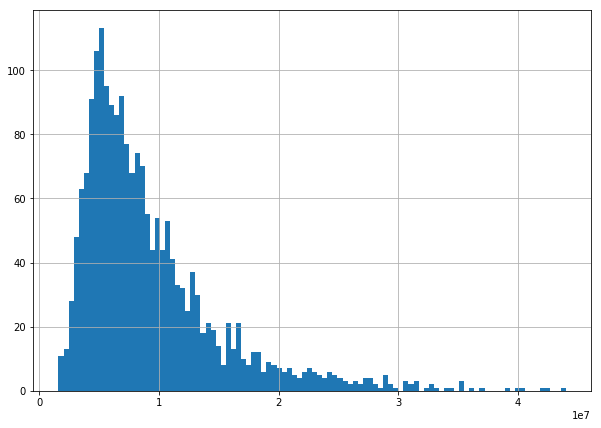

In [82]:
test_df["price"].hist(bins=100,figsize=(10,7))

We can see that before transformation, the distribution is a Gaussian distribution which is right/positive skewed. that means there is a bias in the model with less variance. We can also spot the outliers in the plot.

#### Standardization

In [83]:
#performing Z-score Standardization on price column
std_scale = preprocessing.StandardScaler().fit(test_df[['price']])
df_std = std_scale.transform(test_df[['price']]) # an array not a df
df_std[0:5]

array([[-0.70677944],
       [ 0.03673713],
       [ 2.59475626],
       [-0.82756734],
       [-0.62122135]])

In [84]:
#adding the trnasformed column in the dataframe
test_df["Z_Transformed_Price"] = df_std

####  Standardization

In [85]:
print('Mean after standardisation:\n Price = {:.2f}'
      .format(abs(test_df["Z_Transformed_Price"].mean())))
print('\nStandard deviation after standardisation:\nPrice = {:.2f}'
      .format(test_df["Z_Transformed_Price"].std()))

Mean after standardisation:
 Price = 0.00

Standard deviation after standardisation:
Price = 1.00


We can see that after standardizatin the mean and standard deviation are 0 and 1, Which are the characheristics of Normal Distribution.

#### After Standardization

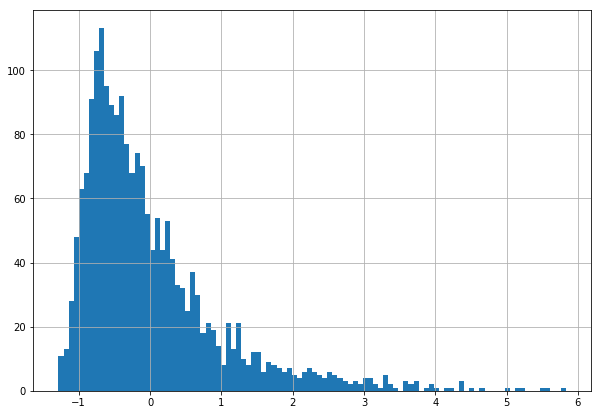

In [86]:
test_df["Z_Transformed_Price"].hist(bins=100,figsize=(10,7))

We can observe that the distribution hasnt changeed much, but the values in the property values in the x-axis have been normalized. and the mean is at 0.

#### Linear Regression for Standardization

In [87]:
#selecting specific columns for regression
regression_df = test_df[["bedrooms","bathrooms","parking_space","property_type","Z_Transformed_Price"]]

In [88]:
#performing one-hot encoding for property type, since it is categorical
one_hot = pd.get_dummies(regression_df["property_type"])
regression_df = regression_df.join(one_hot)
regression_df.head()

,bedrooms,bathrooms,parking_space,property_type,Z_Transformed_Price,house
0,3.0,1.0,1.0,house,-0.706779,1
1,3.0,1.0,1.0,house,0.036737,1
2,4.0,2.0,2.0,house,2.594756,1
3,3.0,1.0,0.0,house,-0.827567,1
4,4.0,2.0,2.0,house,-0.621221,1


In [89]:
#setting the target variable to y
y = regression_df["Z_Transformed_Price"]

#setting the train varibles to train
train = regression_df[["bedrooms","bathrooms","parking_space","house"]]

#fitting the model on test and train
model = sm.OLS(y,train).fit()

#getting the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Z_Transformed_Price   R-squared:                       0.090
Model:                             OLS   Adj. R-squared:                  0.088
Method:                  Least Squares   F-statistic:                     64.38
Date:                 Fri, 26 Oct 2018   Prob (F-statistic):           1.07e-39
Time:                         23:46:44   Log-Likelihood:                -2697.3
No. Observations:                 1966   AIC:                             5403.
Df Residuals:                     1962   BIC:                             5425.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.1298      0.035      3.757      0.000       0.062       0.198
bathrooms         0.3565      0.042      8.474      0.000       0.274       0.439
parking_space     0.0271      0.030      0.900      0.368      -0.032       0.086
house            -1.0172      0.094    -10.860      0.000      -1.201      -0.833
==============================================================================
Omnibus:                      651.999   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2224.825
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                       7.046   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, we can observe that the R-squared value is 0.09 which is roughly 9%. This suggests that the given variables are not the most appropriate predictors to fit the price. We can also observe that the skewness is 1.642 which suggests the the distribution is positively skewed with a magnitude of 1.642. We look at other transformations and conclude about the performance of each of the model towards the end.

### 2.2 min-max normalization

In this section we will perform min-max normalization and see the affects of it while fitting a linear regression model.

In [90]:
#performing min max normalization using MinMaxScaler provided by sklearn
minmax_scale = preprocessing.MinMaxScaler().fit(test_df[['price']])
df_minmax = minmax_scale.transform(test_df[['price']])
df_minmax[0:5]

array([[0.08124042],
       [0.1857564 ],
       [0.54533663],
       [0.06426129],
       [0.0932673 ]])

In [91]:
#setting a column to the dataframe
test_df["min_max_price"] = df_minmax

#### After min-max normalization

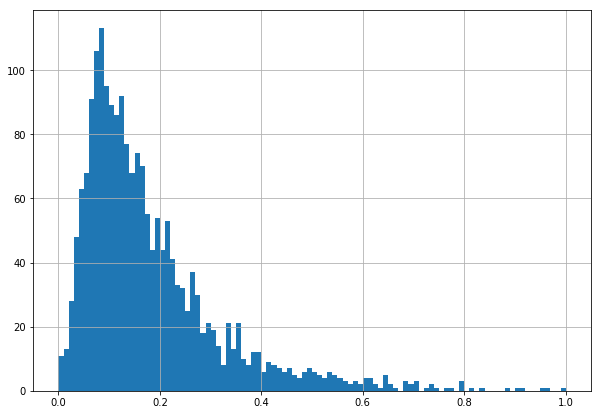

In [92]:
test_df["min_max_price"].hist(bins=100,figsize=(10,7))

We can observe that there is still a high resemblance between the distribution of price before and after normalization. However , we can observe that all the price values have been reduced to the values between 0 and 1. this essentially makes sure that the model is not baised towards higher values as normalizing values within a range, theoretically should enhance the accuracy, if not less. We can examine by performing a linear regression model on this.

#### Linear Regression for min-max normalization

In [93]:
regression_df = test_df[["bedrooms","bathrooms","parking_space","property_type","min_max_price"]]
one_hot = pd.get_dummies(regression_df["property_type"])
regression_df = regression_df.join(one_hot)
regression_df.head()

,bedrooms,bathrooms,parking_space,property_type,min_max_price,house
0,3.0,1.0,1.0,house,0.081240,1
1,3.0,1.0,1.0,house,0.185756,1
2,4.0,2.0,2.0,house,0.545337,1
3,3.0,1.0,0.0,house,0.064261,1
4,4.0,2.0,2.0,house,0.093267,1


In [94]:
#setting the target variable to y
y = regression_df["min_max_price"]

#setting the train varibles to train
train = regression_df[["bedrooms","bathrooms","parking_space","house"]]

#fitting the model on test and train
model = sm.OLS(y,train).fit()

#getting the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          min_max_price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     64.38
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           1.07e-39
Time:                        23:46:45   Log-Likelihood:                 1160.0
No. Observations:                1966   AIC:                            -2312.
Df Residuals:                    1962   BIC:                            -2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.0182      0.005      3.757      0.000       0.009       0.028
bathrooms         0.0501      0.006      8.474      0.000       0.039       0.062
parking_space     0.0038      0.004      0.900      0.368      -0.004       0.012
house             0.0376      0.013      2.856      0.004       0.012       0.063
==============================================================================
Omnibus:                      651.999   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2224.825
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                       7.046   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On the contrary, the model summary indicates that the R-squared value has remained the same as it was after standardization as performed previosuly. All the metrics including that of R-squared, Skewness and Kurtosis. However for the predictor "house" we see a positive coefficient as comapred to the previous model.However this doesnt make any visibile difference in any of the other metric. Therefore we move on to other transformations.

### 2.3 Root Transformation

In this section we will perform Root Transformation on the price column by taking the square root of the price values. We will perform regression on these and analyse the results.

In [95]:
#computing square root of price and assigning it to a column in the dataframe
test_df['sq_root_price'] = None
sqrt_list = []
for i,row in test_df.iterrows():
    sqrt_list.append(math.sqrt(row["price"]))
        
test_df['sq_root_price'] = sqrt_list

#### After Root Transformation

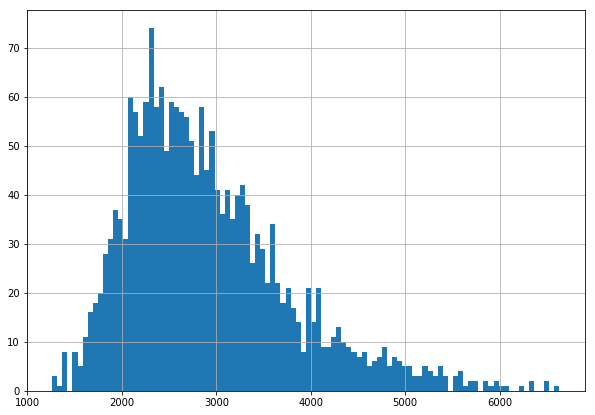

In [96]:
test_df["sq_root_price"].hist(bins=100,figsize=(10,7))

We can observe from the above histogram that the trnasformation has caused the skewness to go down. the peak of the curve has subtly moved towards the centre, masquerading as a slightly right skewed Gaussin Distribution. upon applying regression to this transformation, we expect to see a decrease in the skewness. We perform regression.

#### Linear Regression for Root normalization

In [97]:
regression_df = test_df[["bedrooms","bathrooms","parking_space","property_type","sq_root_price"]]
one_hot = pd.get_dummies(regression_df["property_type"])
regression_df = regression_df.join(one_hot)
regression_df.head()

,bedrooms,bathrooms,parking_space,property_type,sq_root_price,house
0,3.0,1.0,1.0,house,2244.994432,1
1,3.0,1.0,1.0,house,3077.661450,1
2,4.0,2.0,2.0,house,4971.921158,1
3,3.0,1.0,0.0,house,2078.460969,1
4,4.0,2.0,2.0,house,2355.843798,1


In [98]:
#setting the target variable to y
y = regression_df["sq_root_price"]

#setting the train varibles to train
train = regression_df[["bedrooms","bathrooms","parking_space","house"]]

#fitting the model on test and train
model = sm.OLS(y,train).fit()

#getting the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sq_root_price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     58.76
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           2.26e-36
Time:                        23:46:46   Log-Likelihood:                -16008.
No. Observations:                1966   AIC:                         3.202e+04
Df Residuals:                    1962   BIC:                         3.205e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms        105.9575     30.112      3.519      0.000      46.903     165.012
bathrooms       302.0048     36.676      8.234      0.000     230.076     373.934
parking_space    16.9949     26.205      0.649      0.517     -34.399      68.388
house          2075.4966     81.654     25.418      0.000    1915.359    2235.634
==============================================================================
Omnibus:                      202.205   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.899
Skew:                           0.822   Prob(JB):                     3.34e-60
Kurtosis:                       3.799   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected we have seen a decrease in the skewness with the value being almost close to 0. However the regression accuracy also has gone down with R-squared value coming down to 8.2% . We can also from the summary read that parking_space is not a significant contributor to this model. the p value of it is greater than 0.05 therefore we cannot reject the null hypothesis parking_space is not contributing to the accuracy of the model.

### 2.4 Power Transformation

In the below section we will perform Power transformation on the price column and see the behavoir post Linear Regression

In [99]:
# computing the square of the price and assigning it to a new columns
test_df['power_price'] = None
power_list = []

for i,row in test_df.iterrows():
    power_list.append(math.pow(row["price"],2))
test_df['power_price'] = power_list

#### After Power Transformation

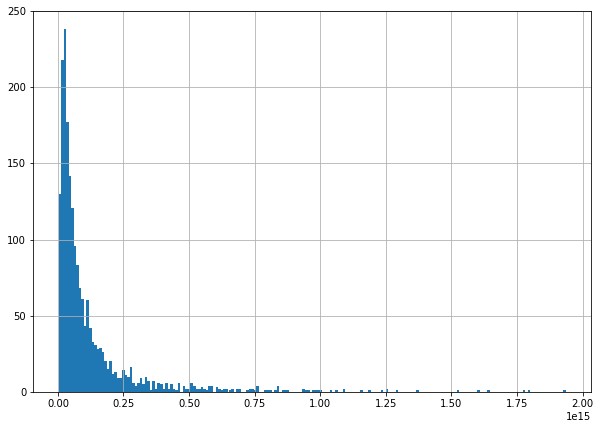

In [100]:
test_df["power_price"].hist(bins=200,figsize=(10,7))

We can see that after Power transformation, the distribution has concentrated to the left of the graph. with maximum values are between 0.00 to 0.25 to the power of 15. this shows that the distribution is exponentially inversely decreasing. Let us go ahead and fit a regression model to it.

In [101]:
regression_df = test_df[["bedrooms","bathrooms","parking_space","property_type","power_price"]]
one_hot = pd.get_dummies(regression_df["property_type"])
regression_df = regression_df.join(one_hot)
regression_df.head()

,bedrooms,bathrooms,parking_space,property_type,power_price,house
0,3.0,1.0,1.0,house,2.540160e+13,1
1,3.0,1.0,1.0,house,8.971878e+13,1
2,4.0,2.0,2.0,house,6.110784e+14,1
3,3.0,1.0,0.0,house,1.866240e+13,1
4,4.0,2.0,2.0,house,3.080250e+13,1


In [102]:
#setting the target variable to y
y = regression_df["power_price"]

#setting the train varibles to train
train = regression_df[["bedrooms","bathrooms","parking_space","house"]]

#fitting the model on test and train
model = sm.OLS(y,train).fit()

#getting the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            power_price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     60.93
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           1.17e-37
Time:                        23:46:48   Log-Likelihood:                -67339.
No. Observations:                1966   AIC:                         1.347e+05
Df Residuals:                    1962   BIC:                         1.347e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       2.509e+13   6.57e+12      3.816      0.000    1.22e+13     3.8e+13
bathrooms      6.339e+13   8.01e+12      7.917      0.000    4.77e+13    7.91e+13
parking_space  7.705e+12   5.72e+12      1.347      0.178   -3.51e+12    1.89e+13
house         -7.062e+13   1.78e+13     -3.962      0.000   -1.06e+14   -3.57e+13
==============================================================================
Omnibus:                     1638.307   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45183.560
Skew:                           3.832   Prob(JB):                         0.00
Kurtosis:                      25.200   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the summary that the R-squared value has increased from 8.2% in sqrt to 8.5% in power transofrmation. However, we can see that skewness and Kurtosis have increased, indicating there is a presence of outliers in the distribution.Therefore, we move onto the log transformation now. 

### 2.5 Log Transformation

In this section we perform log operation on the price column . look at the distribution post transformation and note the behaviour of the model post regression.

In [103]:
#computing log values of price and assigning it to a dataframe column
test_df['log_price'] = None
log_list = []

for i,row in test_df.iterrows():
    log_list.append(math.log(row["price"]))
test_df['log_price'] = log_list

#### After Log Transformation

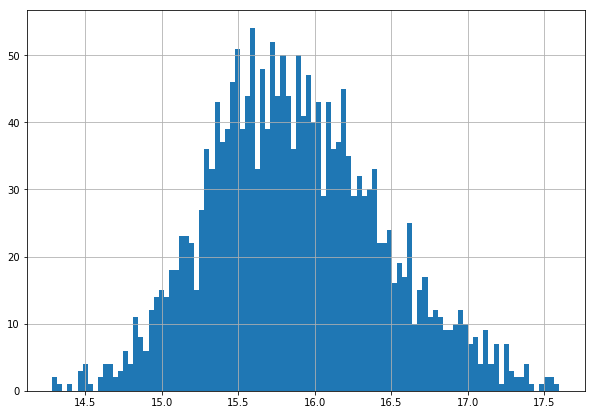

In [104]:
test_df["log_price"].hist(bins=100,figsize=(10,7))

We can observe that log transformation has produced a close to normal distribution, which suggests that the skewness in the data is close to 0, but can we expect to see an increased R-squared value ? Let us examine. 

In [105]:
regression_df = test_df[["bedrooms","bathrooms","parking_space","property_type","log_price"]]
one_hot = pd.get_dummies(regression_df["property_type"])
regression_df = regression_df.join(one_hot)
regression_df.head()

,bedrooms,bathrooms,parking_space,property_type,log_price,house
0,3.0,1.0,1.0,house,15.432917,1
1,3.0,1.0,1.0,house,16.063851,1
2,4.0,2.0,2.0,house,17.023123,1
3,3.0,1.0,0.0,house,15.278766,1
4,4.0,2.0,2.0,house,15.529308,1


In [106]:
#setting the target variable to y
y = regression_df["log_price"]

#setting the train varibles to train
train = regression_df[["bedrooms","bathrooms","parking_space","house"]]

#fitting the model on test and train
model = sm.OLS(y,train).fit()

#getting the summary of the fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     49.42
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           8.73e-31
Time:                        23:46:49   Log-Likelihood:                -1596.1
No. Observations:                1966   AIC:                             3200.
Df Residuals:                    1962   BIC:                             3222.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.0630      0.020      3.195      0.001       0.024       0.102
bathrooms         0.1835      0.024      7.638      0.000       0.136       0.231
parking_space     0.0074      0.017      0.429      0.668      -0.026       0.041
house            15.3722      0.053    287.360      0.000      15.267      15.477
==============================================================================
Omnibus:                       10.501   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.196
Skew:                           0.110   Prob(JB):                       0.0101
Kurtosis:                       2.747   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe from the model summary that the R-squared value has decreased in contradiction to our asumption. This indicates that even though the distribution looks good, the predictors are not significantly contributing towards the fit. We can also observe the skewness is almost close to 0, which indicates less bias and more variance in the data. Also the Kurtosis is less than 3 indicating that the data is uniformly distributed and that it is less susceptible to outliers.

### Conclusion of Performance

Now that we have performed and various kinds of transformations, and performed Linear Regressions and witnessed the performance of each of the transformations on Regression. we now conclude regarding the Linear Regression model and which trnasformation suits the best.Here are the observations:
<ul>
<li>There are many factors that decide the model characeristics and transformation. Given data is not big enough for us to make a pin point conclusion regarding the performance of various types of trnasformation and their model accuracies.</li>

<li>Additionally, the predictors prove to be substandard as all of them are discrete and do not give much relation to the price.We observed these characteristics in when we looked at the summary of the model. The coefficients of these predictors are reasonably insignificant. Therefore, for the given trnasformations and the predictors we have decide between models taking into account on trade offs between each of these values.</li>

<li>Speaking of Trade offs, we can observe that on Standardization and Min-Max normalization, although different operations were performed, the results were alarmingly similar in terms of mertric of summary. Both having similar R-squared value, skewness and Kurtosis. Also, these transformations produced the highest R-squared value of all TRansformations. But for the given prodictors, we observed considerable skewness and high Kurtosis. Which means that although the R-Squared value was the highest, that would be at the cost of high bias and large number of outliers and the distribution not being uniform. Large number of outliers will result in a Garbage in Garbage out situation. But considering purely the R-squared value, Both Standardization and Min-Max transformations performed better than other 3 transformations.</li>

<li>In case of Squared Transformation and Power Transformaion, we observed that these transforamtions did not produce a highrer acccuracy in terms of R-squared value and had considerable skewnwess and high Kurtosis, specially in Power Transoformation. This indicates high number of outliers. Therefore we <b>Do not</b> consider either of these models to good performing and hence not suitable for this model.</li>

<li>Lastly, and more interestingly, The notion of Linear regression is based on the basis of the target variable being normally distributed. Which is true in the case of Log Transformation. Going by the skewness and Kurtosis, the Log Transformation looks the most suitable to perform linear Regression. Reasons being the data is more uniformly distributed and has less outliers. That means given good predictors this model Transformation would produce best results. However due to sub-standard predictors we see a decrease in the R-sqaured value. However, this transformation would be the most appropriate, Theoretically.</li>
</ul>

Finally, it we can conclude that, purely in terms of R-squared value as the only metric to measure the performace of the Transformation:
    1. Standardization(Z-score transformation) and Min-Max Tranformation produces the best result.
    2. In terms of Skewness and Kurtosis metrics which indicate the distribution of the after post transformation, Log Transformation would suit the best. But considering the given predictors, costing us on model accuracy.

## 3. Conclusion

As part of the summary, we performed the following operations as part of Data integration and Reshaping:

<ul>
    <li>We read datasets in various different formats into dataframes. each dataframe conveying a specific information</li>
    <li>We then performed data integration of various information like hospitals, SuperMarkets, Train informations, Suburb inforamtion in the real Estate datset.</li>
    <li>Finally we had a dataset with 21 columns which was consolidated and collated into a single dataframe</li>
    <li>In the second task, we performed various Data Transformation techniques like MinMax normalization, Standardization, Power transforamtion, root Transformation and Log Transformation</li>
    <li>We subsequently measured the performance of these transformations by building a linear Regression model using the given predictors and transformed target value.</li>
    <li>Finally we conclude which of the transformation suits the best fow what kind of trasformation and observed various metrics about the effect of these transformation on the Linear Regression model.</li>
</ul>

## 4. References

<li>Kurtosis
https://en.wikipedia.org/wiki/Kurtosis </li>
<li>Interpretation of the Model summary table - ESS EduNet
http://essedunet.nsd.uib.no/cms/topics/regression/2/2.html</li>
<li>Read a shapefile into a Pandas dataframe
https://gist.github.com/aerispaha/f098916ac041c286ae92d037ba5c37ba</li>
<li>Point in Polygon & Intersect — Intro to Python GIS documentation
https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html</li>
<li>Getting distance between two points based on latitude/longitude
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude</li>
<li>Regression Analysis: How Do I Interpret R-squared and Assess the Goodness-of-Fit?
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit</li>
<li>Linear regression
https://en.wikipedia.org/wiki/Linear_regression</li>